In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
np.random.seed(0)
n = 50
x = np.random.normal(3, 5, size=n)
y = 2 * x + 5 + np.random.normal(0, 3, size=n)

In [5]:
def SSE_loss(w0, w1, x, y):
    pred = w0 + w1 * x
    loss = np.sum((pred - y) ** 2) / len(y)
    return loss

# Generate w0 and w1 values
w0_vals = np.linspace(-10, 10, 100)
w1_vals = np.linspace(-5,5, 100)

# Calculate MSE loss for each (w0, w1)
# Log-scale is used only for better visualization

Z = np.zeros((len(w0_vals),len(w1_vals)))
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        Z[i, j] = np.log(SSE_loss(w0_vals[i], w1_vals[j], x, y))

Z

array([[8.07581392, 8.0523071 , 8.02853634, ..., 5.63656118, 5.68904885,
        5.74189423],
       [8.07068003, 8.04709914, 8.0232523 , ..., 5.63009313, 5.68342679,
        5.73704969],
       [8.06554529, 8.04189018, 8.01796708, ..., 5.62387774, 5.67805214,
        5.73244599],
       ...,
       [7.60014769, 7.56963841, 7.53866182, ..., 6.18440395, 6.24396904,
        6.30188344],
       [7.59586059, 7.5652965 , 7.53426377, ..., 6.19691829, 6.25605399,
        6.31356604],
       [7.59159622, 7.56097813, 7.52989011, ..., 6.20944207, 6.26814939,
        6.3252599 ]])

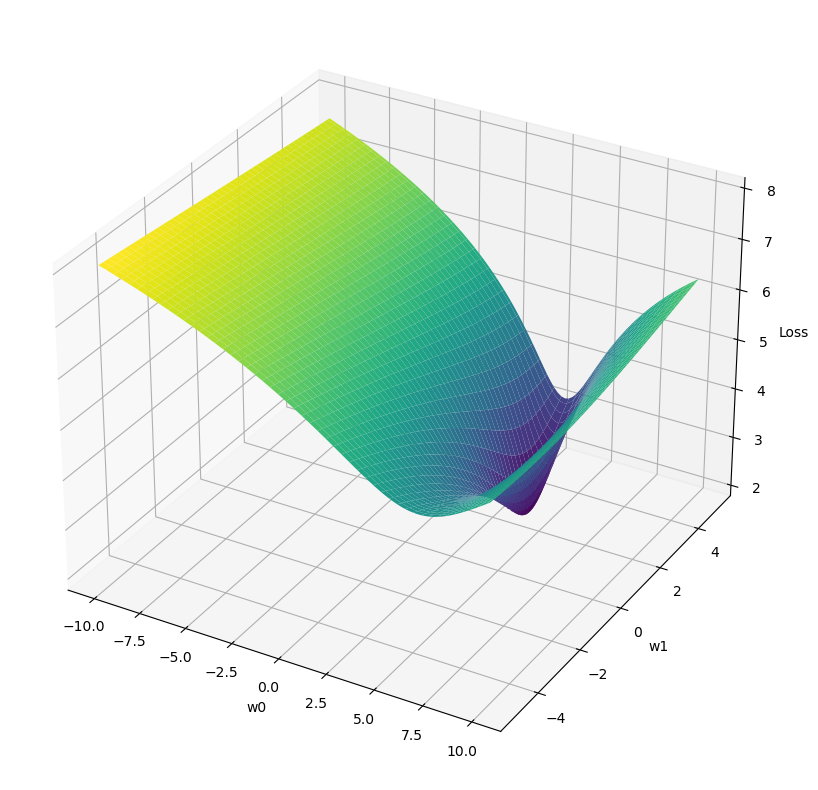

In [6]:
# 3D Plot of MSE loss in log-scale
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, Z, cmap='viridis')

# Adding labels
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss')
plt.show()

Batch GD: w0=5.02, w1=1.97, Error=6.743
0.00013307937157663885


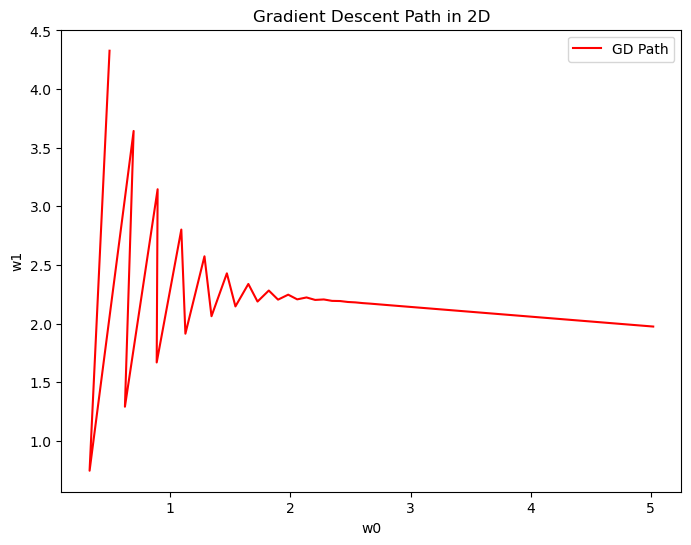

In [7]:
def gradient(w0, w1, x, y):
    yhat = w0 + w1 * x # yhat is y_predict
    error = (y-yhat)**2 # squerd error of (w0, w1)
    dw0 = - 2 * (y - yhat)
    dw1 = - 2 * x * (y - yhat)
    return dw0, dw1, error
w0, w1 = 0, 0
alpha = 0.02
w0l, w1l, errl = [], [], []

for epoch in range(1000):
    Gw0, Gw1, Error = 0, 0, 0
    for i in range(n):
        gw0, gw1, err = gradient(w0, w1, x[i], y[i])
        Gw0, Gw1, Error = Gw0 + gw0, Gw1 + gw1, Error + err
    Gw0, Gw1, Error = Gw0 / n, Gw1 / n, Error / n
    w0, w1 = w0 - alpha * Gw0, w1 - alpha * Gw1
    alpha = 0.995 * alpha  # Decay learning rate
    w0l.append(w0)
    w1l.append(w1)
    errl.append(Error)


print(f"Batch GD: w0={round(w0, 2)}, w1={round(w1, 2)}, Error={round(Error, 3)}")
print(alpha)

plt.figure(figsize=(8, 6))
plt.plot(w0l, w1l, color='r', label='GD Path')
plt.title("Gradient Descent Path in 2D")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend()
plt.show()

SGD: w0=5.0, w1=1.98, Error=1.562
Final learning rate: 2.851459988266944e-111


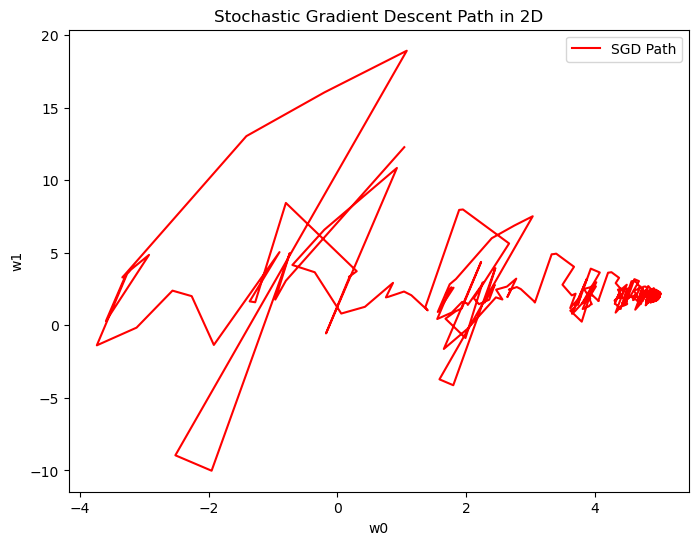

In [8]:
# Define the gradient function
def gradient(w0, w1, x, y):
    yhat = w0 + w1 * x  # yhat is y_predict
    error = (y - yhat) ** 2  # squared error of (w0, w1)
    dw0 = -2 * (y - yhat)  # derivative of error w.r.t. w0
    dw1 = -2 * x * (y - yhat)  # derivative of error w.r.t. w1
    return dw0, dw1, error

# Initialize weights and hyperparameters
w0, w1 = 0, 0
alpha = 0.02  # Initial learning rate
w0l, w1l, errl = [], [], []  # Lists to store weight and error history

# Number of epochs
epochs = 1000

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(n):  # Iterate over each data point
        # Compute gradient for the current data point
        gw0, gw1, err = gradient(w0, w1, x[i], y[i])
            
        # Update weights using the current data point's gradient
        w0 = w0 - alpha * gw0
        w1 = w1 - alpha * gw1
        alpha = 0.995 * alpha

        
        # Append updated weights and error to lists
        w0l.append(w0)
        w1l.append(w1)
        errl.append(err)
    
    # Decay learning rate after each epoch

# Print final results
print(f"SGD: w0={round(w0, 2)}, w1={round(w1, 2)}, Error={round(errl[-1], 3)}")
print(f"Final learning rate: {alpha}")

# Plot the path of weights in 2D
plt.figure(figsize=(8, 6))
plt.plot(w0l, w1l, color='r', label='SGD Path')
plt.title("Stochastic Gradient Descent Path in 2D")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend()
plt.show()

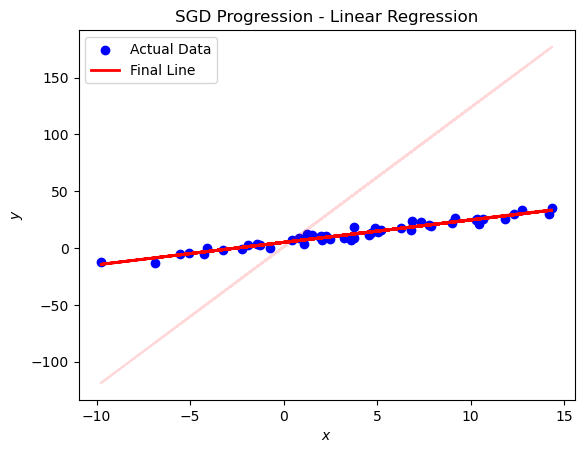

In [9]:
# Scatter plot of the actual data
plt.scatter(x, y, color='blue', label='Actual Data')

# Plot lines for every 50th step with increasing alpha
step_size = len(w0l) // 100  # Adjust step size to plot 100 lines
for idx, i in enumerate(range(0, len(w0l), step_size)):
    alpha = 0.15 + 0.85 * (idx / 100)  # Increase alpha for better visualization
    w0 = w0l[i]  # Get w0 at the current step
    w1 = w1l[i]  # Get w1 at the current step
    yhat = w0 + w1 * x  # Compute predicted y values
    plt.plot(x, yhat, color='red', alpha=alpha)

# Plot the final regression line
y_final = w0l[-1] + w1l[-1] * x
plt.plot(x, y_final, color='red', lw=2, label='Final Line')

# Add labels, title, and legend
plt.title("SGD Progression - Linear Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()


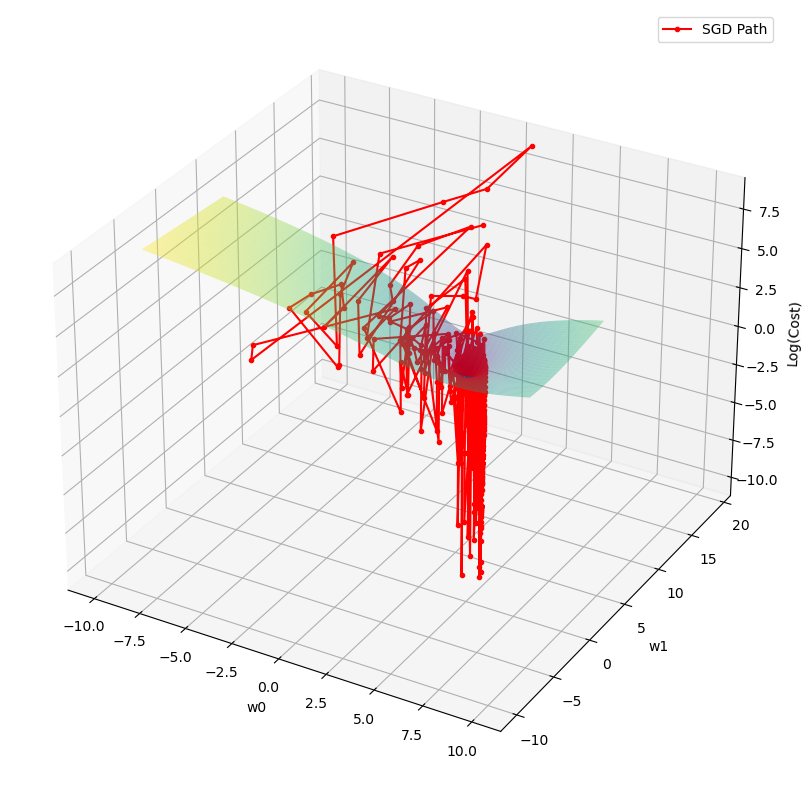

In [10]:
# Create a 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the MSE loss surface in log-scale
W0, W1 = np.meshgrid(w0_vals, w1_vals)  # Meshgrid for w0 and w1 values
ax.plot_surface(W0, W1, Z, cmap='viridis', alpha=0.4)  # Plot the surface

# Compute the log of the cost history
cost_history_log = np.log(np.array(errl))

# Plot the path of SGD in 3D
ax.plot(w0l, w1l, cost_history_log, marker='o', color='r', label='SGD Path', markersize=3)

# Add labels and legend
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.set_zlabel("Log(Cost)")
plt.legend()
plt.show()

In [11]:
#mini batch

In [12]:
w0, w1 = 0, 0
alpha = 0.02  # Initial learning rate
batch_size = 10  # Size of each mini-batch
w0l, w1l, errl = [], [], []  # Lists to store weight and error history

# Number of epochs
epochs = 1000

# Mini-Batch Gradient Descent
for epoch in range(epochs):
    # Shuffle the data (optional but recommended for MBGD)
    indices = np.random.permutation(len(x))
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    # Iterate over mini-batches
    for i in range(0, len(x), batch_size):
        x_batch = x_shuffled[i:i + batch_size]
        y_batch = y_shuffled[i:i + batch_size]
        
        # Compute gradients for the current mini-batch
        Gw0, Gw1, Error = 0, 0, 0
        for xi, yi in zip(x_batch, y_batch):
            gw0, gw1, err = gradient(w0, w1, xi, yi)
            Gw0 += gw0
            Gw1 += gw1
            Error += err
        
        # Average gradients and error for the mini-batch
        Gw0, Gw1, Error = Gw0 / len(x_batch), Gw1 / len(x_batch), Error / len(x_batch)
        
        # Update weights
        w0 = w0 - alpha * Gw0
        w1 = w1 - alpha * Gw1
        
        # Append updated weights and error to lists
        w0l.append(w0)
        w1l.append(w1)
        errl.append(Error)
    
    # Decay learning rate after each epoch
    alpha = 0.995 * alpha

# Print final results
print(f"Mini-Batch GD: w0={round(w0, 2)}, w1={round(w1, 2)}, Error={round(errl[-1], 3)}")
print(f"Final learning rate: {alpha}")

Mini-Batch GD: w0=5.04, w1=1.97, Error=4.343
Final learning rate: 0.00013307937157663885


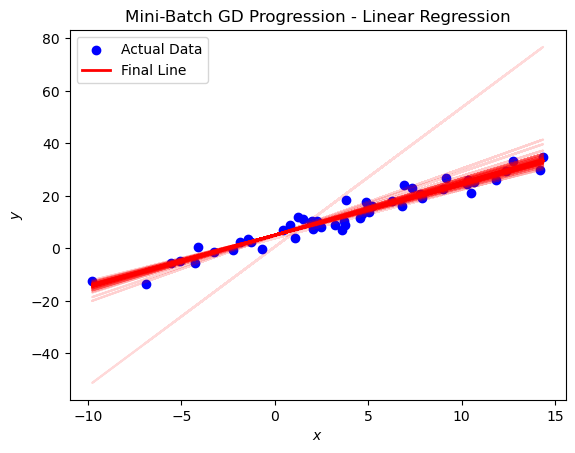

In [13]:
# Scatter plot of the actual data
plt.scatter(x, y, color='blue', label='Actual Data')

# Plot lines for every 50th step with increasing alpha
step_size = len(w0l) // 100  # Adjust step size to plot 100 lines
for idx, i in enumerate(range(0, len(w0l), step_size)):
    alpha_line = 0.15 + 0.85 * (idx / 100)  # Increase alpha for better visualization
    w0 = w0l[i]  # Get w0 at the current step
    w1 = w1l[i]  # Get w1 at the current step
    yhat = w0 + w1 * x  # Compute predicted y values
    plt.plot(x, yhat, color='red', alpha=alpha_line)

# Plot the final regression line
y_final = w0l[-1] + w1l[-1] * x
plt.plot(x, y_final, color='red', lw=2, label='Final Line')

# Add labels, title, and legend
plt.title("Mini-Batch GD Progression - Linear Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

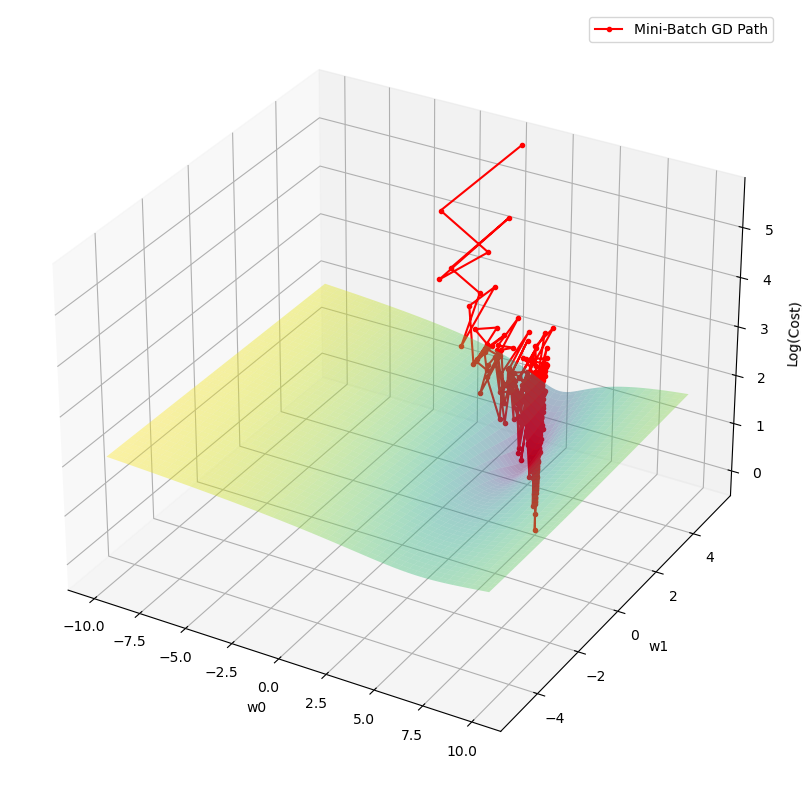

In [14]:
# Create a 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the MSE loss surface in log-scale
ax.plot_surface(W0, W1, np.log(Z), cmap='viridis', alpha=0.4)  # Log-scale for better visualization

# Compute the log of the cost history
cost_history_log = np.log(np.array(errl))

# Plot the path of Mini-Batch GD in 3D
ax.plot(w0l, w1l, cost_history_log, marker='o', color='r', label='Mini-Batch GD Path', markersize=3)

# Add labels and legend
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.set_zlabel("Log(Cost)")
plt.legend()
plt.show()

In [15]:
# Function to generate polynomial features (input matrix X')
def polynomial_features(X, degree):
    X_poly = np.c_[np.ones(len(X))]
    
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X**i]

    return X_poly

In [16]:
def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    # Closed-form solution: w = (X'^T * X')^-1 * X'^T * y
    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return w

m = 5  # Degree of the polynomial regression
w_poly = polynomial_regression(x, y, m)  # Parameter vector w

print(f"Parameters (w) for Degree {m}: {w_poly}")

Parameters (w) for Degree 5: [ 5.25736712e+00  2.04104594e+00 -3.00730819e-02  7.29665489e-04
  3.49111406e-04 -2.07678002e-05]


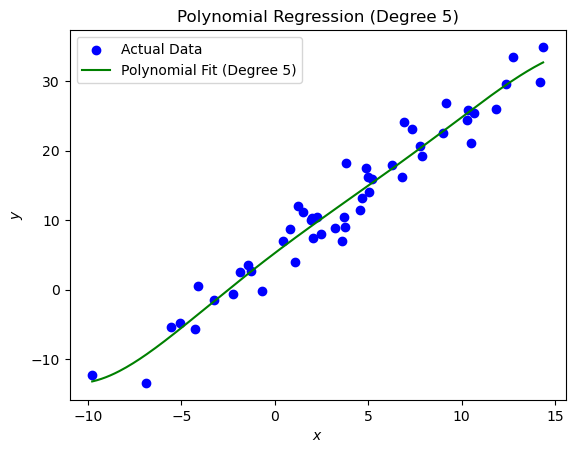

In [17]:
X_fit = np.linspace(x.min(), x.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)  # h_w(x) = yhat = X' * w

plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [18]:
for degree in range(1, 10):
    # Perform polynomial regression
    w_poly = polynomial_regression(x, y, degree)
    
    # Print the results
    print(f"Degree {degree}: Parameters (w) = {w_poly}")

Degree 1: Parameters (w) = [5.03845876 1.97264541]
Degree 2: Parameters (w) = [ 5.09959696e+00  1.99232809e+00 -2.95321680e-03]
Degree 3: Parameters (w) = [ 4.97351518e+00  2.02476732e+00  2.09778416e-03 -5.88883413e-04]
Degree 4: Parameters (w) = [ 5.02117767e+00  2.07532863e+00 -5.20148582e-03 -1.46472199e-03
  8.63931268e-05]
Degree 5: Parameters (w) = [ 5.25736712e+00  2.04104594e+00 -3.00730819e-02  7.29665489e-04
  3.49111406e-04 -2.07678002e-05]
Degree 6: Parameters (w) = [ 5.39442608e+00  1.69114971e+00 -1.95939680e-02  1.88037703e-02
 -6.66168359e-04 -1.73362436e-04  9.85380193e-06]
Degree 7: Parameters (w) = [ 5.03902262e+00  1.61648529e+00  6.71505931e-02  1.98837300e-02
 -3.56933891e-03 -7.00697621e-05  3.10251812e-05 -1.15467369e-06]
Degree 8: Parameters (w) = [ 5.13680053e+00  1.53287268e+00  4.81968494e-02  2.89661686e-02
 -3.16698278e-03 -3.02601582e-04  3.55016650e-05  3.76479156e-07
 -7.14516506e-08]
Degree 9: Parameters (w) = [ 5.63068185e+00  2.16799981e+00 -2.06063

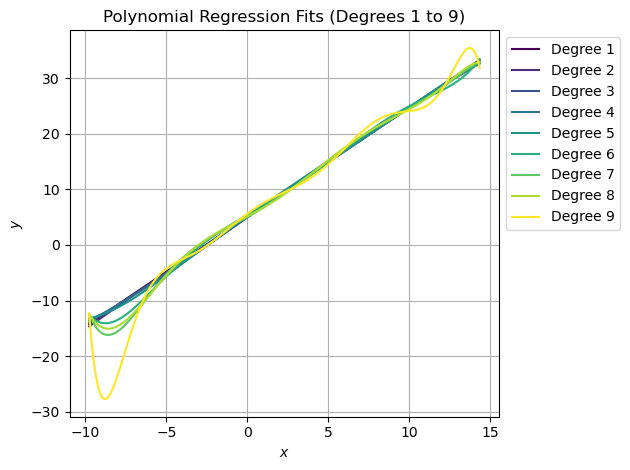

In [19]:
# Loop through degrees from 1 to 9
degrees = range(1, 10)
colors = plt.cm.viridis(np.linspace(0, 1, len(degrees)))  # Different colors for each degree

for degree, color in zip(degrees, colors):
    # Perform polynomial regression
    w_poly = polynomial_regression(x, y, degree)
    
    # Generate polynomial features for the smooth curve
    X_fit_poly = polynomial_features(X_fit, degree)
    
    # Predict y values for the smooth curve
    y_poly_pred = X_fit_poly.dot(w_poly)
    
    # Plot the polynomial fit
    plt.plot(X_fit, y_poly_pred, color=color, label=f'Degree {degree}')

# Add labels, title, and legend
plt.title("Polynomial Regression Fits (Degrees 1 to 9)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

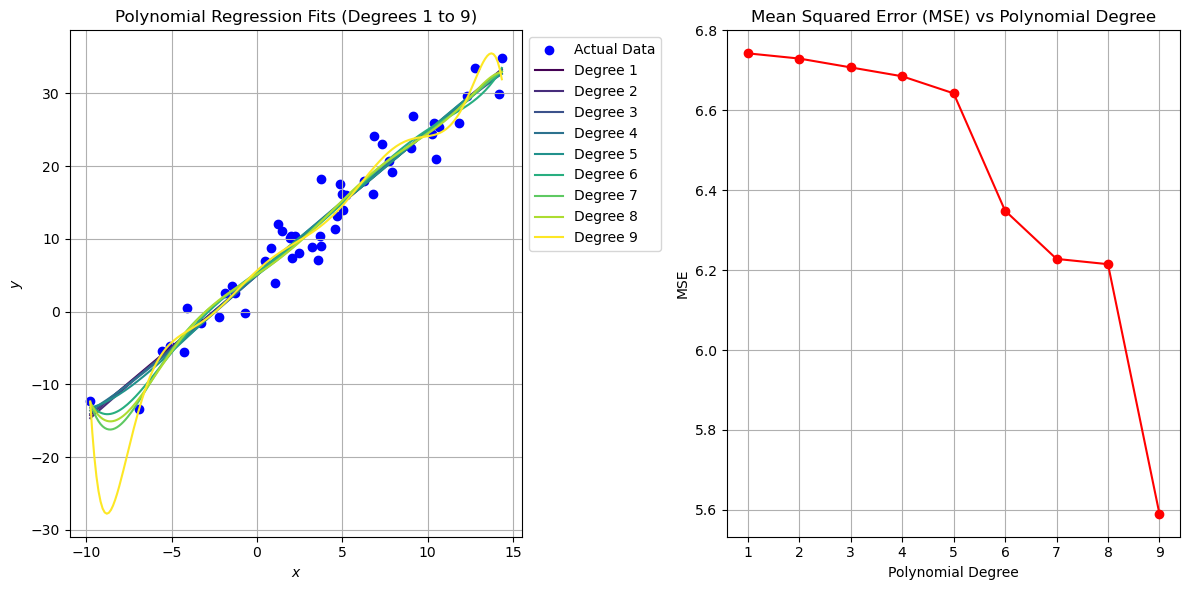

In [22]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)


X_fit = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)

# Plot the actual data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for polynomial fits
plt.scatter(x, y, color='blue', label='Actual Data')

# Loop through degrees from 1 to 9
degrees = range(1, 10)
colors = plt.cm.viridis(np.linspace(0, 1, len(degrees)))  # Different colors for each degree
mse_values = []  # Store MSE values for each degree

for degree, color in zip(degrees, colors):
    # Perform polynomial regression
    w_poly = polynomial_regression(x, y, degree)
    
    # Generate polynomial features for the smooth curve
    X_fit_poly = polynomial_features(X_fit, degree)
    
    # Predict y values for the smooth curve
    y_poly_pred = X_fit_poly.dot(w_poly)
    
    # Plot the polynomial fit
    plt.plot(X_fit, y_poly_pred, color=color, label=f'Degree {degree}')
    
    # Calculate MSE for the training data
    X_poly = polynomial_features(x, degree)
    y_pred = X_poly.dot(w_poly)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

# Add labels, title, and legend for the polynomial fits
plt.title("Polynomial Regression Fits (Degrees 1 to 9)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.grid(True)

# Plot MSE values
plt.subplot(1, 2, 2)  # Subplot for MSE
plt.plot(degrees, mse_values, marker='o', linestyle='-', color='red')
plt.title("Mean Squared Error (MSE) vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()